# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# The datetime, day, and time objects

In [2]:
# datetime object for Dec 15 2014
datetime(2014, 12, 15)

datetime.datetime(2014, 12, 15, 0, 0)

In [3]:
# specific date and also with a time of 5:30 pm
datetime(2014, 12, 15, 17, 30)

datetime.datetime(2014, 12, 15, 17, 30)

In [4]:
# get the local "now" (date and time)
# can take a timezone, but that's not demonstrated here
datetime.now()

datetime.datetime(2019, 9, 20, 11, 47, 6, 166422)

In [5]:
# a date without time can be represented
# by creating a date using a datetime object
datetime.date(datetime(2014, 12, 15))

datetime.date(2014, 12, 15)

In [6]:
# get just the current date
datetime.now().date()

datetime.date(2019, 9, 20)

In [7]:
# get just a time from a datetime
datetime.time(datetime(2014, 12, 15, 17, 30))

datetime.time(17, 30)

In [8]:
# get the current local time
datetime.now().time()

datetime.time(11, 47, 9, 994725)

# Timestamp objects

In [9]:
# a timestamp representing a specific date
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [10]:
# a timestamp with both date and time
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

In [11]:
# timestamp with just a time
# which adds in the current local date
pd.Timestamp('17:30')

Timestamp('2019-09-20 17:30:00')

In [12]:
# get the current date and time (now)
pd.Timestamp("now")

Timestamp('2019-09-20 11:48:12.931086')

# Timedelta

In [13]:
# what is one day from 2014-11-30?
today = datetime(2014, 11, 30)
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2014, 12, 1, 0, 0)

In [14]:
# how many days between these two dates?
date1 = datetime(2014, 12, 2)
date2 = datetime(2014, 11, 28)
date1 - date2

datetime.timedelta(days=4)

# The DatetimeIndex

In [15]:
# create a very simple time-series with two index labels
# and random values
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.821516
2014-08-02    0.250721
dtype: float64

In [16]:
# what is the type of the index?
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
# and we can see it is a collection of timestamps
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
# create from just a list of dates as strings!
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

In [19]:
# convert a sequence of objects to a DatetimeIndex
dti = pd.to_datetime(['Aug 1, 2014', 
                      '2014-08-02', 
                      '2014.8.3', 
                      None])
for l in dti: print (l)

2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


In [20]:
# this is a list of objects, not timestamps...
# Throws an error in 0.20.1
# pd.to_datetime(['Aug 1, 2014', 'foo'])

In [21]:
# force the conversion, NaT for items that dont work
pd.to_datetime(['Aug 1, 2014', 'foo'], errors="coerce")

DatetimeIndex(['2014-08-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
# create a range of dates starting at a specific date
# and for a specific number of days, creating a Series
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [23]:
# slice by location
subset = date_series[3:7]
subset

2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [24]:
# a Series to demonstrate alignment
s2 = pd.Series([10, 100, 1000, 10000], subset.index)
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

In [25]:
# demonstrate alignment by date on a subset of items
date_series + s2

2014-08-01             NaN
2014-08-02             NaN
2014-08-03             NaN
2014-08-04        8.864368
2014-08-05      101.212112
2014-08-06      999.826785
2014-08-07    10000.119209
2014-08-08             NaN
2014-08-09             NaN
2014-08-10             NaN
Freq: D, dtype: float64

In [26]:
# lookup item by a string representing a date
date_series['2014-08-05']

1.2121120250208506

In [27]:
# slice between two dates specified by string representing dates
date_series['2014-08-05':'2014-08-07']

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [28]:
# a two year range of daily data in a Series
# only select those in 2013
s3 = pd.Series(0, pd.date_range('2013-01-01', '2014-12-31'))
s3['2013']

2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Freq: D, Length: 365, dtype: int64

In [29]:
# 31 items for May 2014
s3['2014-05'] 

2014-05-01    0
2014-05-02    0
2014-05-03    0
2014-05-04    0
2014-05-05    0
             ..
2014-05-27    0
2014-05-28    0
2014-05-29    0
2014-05-30    0
2014-05-31    0
Freq: D, Length: 31, dtype: int64

In [30]:
# items between two months
s3['2014-08':'2014-09']

2014-08-01    0
2014-08-02    0
2014-08-03    0
2014-08-04    0
2014-08-05    0
             ..
2014-09-26    0
2014-09-27    0
2014-09-28    0
2014-09-29    0
2014-09-30    0
Freq: D, Length: 61, dtype: int64

# Creating time-series data with specific frequencies

In [31]:
# generate a Series at one minute intervals
np.random.seed(123456)
bymin = pd.Series(np.random.randn(24*60*90), 
                  pd.date_range('2014-08-01', 
                                '2014-10-29 23:59',
                                freq='T'))
bymin[:5]

2014-08-01 00:00:00    0.469112
2014-08-01 00:01:00   -0.282863
2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
Freq: T, dtype: float64

In [32]:
# slice down to the minute
bymin['2014-08-01 00:02':'2014-08-01 00:07']

2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
2014-08-01 00:05:00   -0.173215
2014-08-01 00:06:00    0.119209
2014-08-01 00:07:00   -1.044236
Freq: T, dtype: float64

In [33]:
# generate a series based upon business days
days = pd.date_range('2014-08-29', '2014-09-05', freq='B')
days

DatetimeIndex(['2014-08-29', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04', '2014-09-05'],
              dtype='datetime64[ns]', freq='B')

In [34]:
# periods will use the frequency as the increment
pd.date_range('2014-08-01 12:10:01', freq='S', periods=5)

DatetimeIndex(['2014-08-01 12:10:01',
               '2014-08-01 12:10:02',
               '2014-08-01 12:10:03',
               '2014-08-01 12:10:04',
               '2014-08-01 12:10:05'],
              dtype='datetime64[ns]', freq='S')

# Date offsets

In [35]:
# get all business days between and inclusive of these two dates
dti = pd.date_range('2014-08-29', '2014-09-05', freq='B')
dti.values

array(['2014-08-29T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-09-02T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
       '2014-09-04T00:00:00.000000000', '2014-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [36]:
# check the frequency is BusinessDay
dti.freq

<BusinessDay>

In [37]:
# calculate a one day offset from 2014-8-29
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1) 
d + do

Timestamp('2014-08-30 00:00:00')

In [38]:
# import the data offset types
from pandas.tseries.offsets import *
# calculate one business day from 2014-8-31
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [39]:
# determine 2 business days from 2014-8-29
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

In [40]:
# what is the next business month end
# from a specific date?
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

In [41]:
# calculate the next month end by
# rolling forward from a specific date
BMonthEnd().rollforward(datetime(2014, 9, 15))

Timestamp('2014-09-30 00:00:00')

In [42]:
# calculate the date of the Tuesday previous
# to a specified date 
d - Week(weekday = 1)

Timestamp('2014-08-26 00:00:00')

# Anchored Offsets

In [43]:
# calculate all Wednesdays between 2014-06-01
# and 2014-08-31
wednesdays = pd.date_range('2014-06-01', 
                           '2014-07-31', freq="W-WED")
wednesdays.values

array(['2014-06-04T00:00:00.000000000', '2014-06-11T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-06-25T00:00:00.000000000',
       '2014-07-02T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-16T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [44]:
# what are all of the business quarterly end
# dates in 2014?
qends = pd.date_range('2014-01-01', '2014-12-31', 
                      freq='BQS-JUN')
qends.values

array(['2014-03-03T00:00:00.000000000', '2014-06-02T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

# The Period object

In [45]:
# create a period representing a month of time
# starting in August 2014
aug2014 = pd.Period('2014-08', freq='M')
aug2014

Period('2014-08', 'M')

In [46]:
# examine the start and end times of this period
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [47]:
# calculate the period that is one frequency
# unit of the aug2014 period further along in time
# This happens to be September 2014
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

In [48]:
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

# The PeriodIndex

In [49]:
# create a period index representing all monthly boundaries in 2013
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04',
             '2013-05', '2013-06', '2013-07', '2013-08',
             '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]', freq='M')

In [50]:
# loop through all period objects in the index
# printing start and end time for each
for p in mp2013: 
    print ("{0} {1}".format(p.start_time, p.end_time))

2013-01-01 00:00:00 2013-01-31 23:59:59.999999999
2013-02-01 00:00:00 2013-02-28 23:59:59.999999999
2013-03-01 00:00:00 2013-03-31 23:59:59.999999999
2013-04-01 00:00:00 2013-04-30 23:59:59.999999999
2013-05-01 00:00:00 2013-05-31 23:59:59.999999999
2013-06-01 00:00:00 2013-06-30 23:59:59.999999999
2013-07-01 00:00:00 2013-07-31 23:59:59.999999999
2013-08-01 00:00:00 2013-08-31 23:59:59.999999999
2013-09-01 00:00:00 2013-09-30 23:59:59.999999999
2013-10-01 00:00:00 2013-10-31 23:59:59.999999999
2013-11-01 00:00:00 2013-11-30 23:59:59.999999999
2013-12-01 00:00:00 2013-12-31 23:59:59.999999999


In [51]:
# create a Series with a PeriodIndex
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013)
ps[:5]

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
Freq: M, dtype: float64

In [52]:
# create a Series with a PeriodIndex and which
# represents all calendar month periods in 2013 and 2014
np.random.seed(123456)
ps = pd.Series(np.random.randn(24), 
               pd.period_range('1/1/2013', 
                               '12/31/2014', freq='M'))
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 24, dtype: float64

In [53]:
# get value for period represented with 2014-06
ps['2014-06']

0.567020349793672

In [54]:
# get values for all periods in 2014
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 12, dtype: float64

In [55]:
# all values between (and including) March and June 2014
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

# Handling holidays using calendars

In [56]:
# demonstrate using the US federal holiday calendar
# first need to import it
from pandas.tseries.holiday import *
# create it and show what it considers holidays
cal = USFederalHolidayCalendar()
for d in cal.holidays(start='2014-01-01', end='2014-12-31'):
    print (d)

2014-01-01 00:00:00
2014-01-20 00:00:00
2014-02-17 00:00:00
2014-05-26 00:00:00
2014-07-04 00:00:00
2014-09-01 00:00:00
2014-10-13 00:00:00
2014-11-11 00:00:00
2014-11-27 00:00:00
2014-12-25 00:00:00


In [57]:
# create CustomBusinessDay object based on the federal calendar
cbd = CustomBusinessDay(holidays=cal.holidays())

# now calc next business day from 2014-8-29
datetime(2014, 8, 29) + cbd

Timestamp('2014-09-02 00:00:00')

# Normalizing timestamps using time zones

In [58]:
# get the current local time and demonstrate there is no
# timezone info by default
now = pd.Timestamp('now')
now, now.tz is None

(Timestamp('2019-09-20 11:53:10.772814'), True)

In [59]:
# default DatetimeIndex and its Timestamps do not have
# time zone information
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng.tz is None, rng[0].tz is None

(True, True)

In [60]:
# import common timezones from pytz
from pytz import common_timezones
# report the first 5
common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [61]:
# get now, and now localized to UTC
now = Timestamp("now")
local_now = now.tz_localize('UTC')
now, local_now

(Timestamp('2019-09-20 11:53:11.526290'),
 Timestamp('2019-09-20 11:53:11.526290+0000', tz='UTC'))

In [62]:
# localize a timestamp to US/Mountain time zone
tstamp = Timestamp('2014-08-01 12:00:00', tz='US/Mountain')
tstamp

Timestamp('2014-08-01 12:00:00-0600', tz='US/Mountain')

In [63]:
# create a DatetimeIndex using a timezone
rng = pd.date_range('3/6/2012 00:00:00', 
                    periods=10, freq='D', tz='US/Mountain')
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

In [64]:
# show use of timezone objects
# need to reference pytz
import pytz
# create an object for two different timezones
mountain_tz = pytz.timezone("US/Mountain")
eastern_tz = pytz.timezone("US/Eastern")
# apply each to 'now'
mountain_tz.localize(now), eastern_tz.localize(now)

(Timestamp('2019-09-20 11:53:11.526290-0600', tz='US/Mountain'),
 Timestamp('2019-09-20 11:53:11.526290-0400', tz='US/Eastern'))

In [65]:
# create two Series, same start, same periods, same frequencies,
# each with a different timezone
s_mountain = Series(np.arange(0, 5),
                    index=pd.date_range('2014-08-01', 
                                        periods=5, freq="H", 
                                        tz='US/Mountain'))
s_eastern = Series(np.arange(0, 5), 
                   index=pd.date_range('2014-08-01', 
                                       periods=5, freq="H", 
                                       tz='US/Eastern'))
s_mountain

2014-08-01 00:00:00-06:00    0
2014-08-01 01:00:00-06:00    1
2014-08-01 02:00:00-06:00    2
2014-08-01 03:00:00-06:00    3
2014-08-01 04:00:00-06:00    4
Freq: H, dtype: int32

In [66]:
s_eastern

2014-08-01 00:00:00-04:00    0
2014-08-01 01:00:00-04:00    1
2014-08-01 02:00:00-04:00    2
2014-08-01 03:00:00-04:00    3
2014-08-01 04:00:00-04:00    4
Freq: H, dtype: int32

In [67]:
# add the two Series. This only results in three items being aligned
s_eastern + s_mountain

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

In [68]:
# convert s1 from US/Eastern to US/Pacific
s_pacific = s_eastern.tz_convert("US/Pacific")
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: H, dtype: int64

In [69]:
# this will be the same result as s_eastern + s_mountain
# as the timezones still get aligned to be the same
s_mountain + s_pacific

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

# Shifting and lagging 

In [68]:
# create a Series to work with
np.random.seed(123456)
ts = Series([1, 2, 2.5, 1.5, 0.5],
            pd.date_range('2014-08-01', periods=5))
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [69]:
# shift forward one day
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

In [70]:
# lag two days
ts.shift(-2)

2014-08-01    2.5
2014-08-02    1.5
2014-08-03    0.5
2014-08-04    NaN
2014-08-05    NaN
Freq: D, dtype: float64

In [71]:
# calculate daily percentage change
ts / ts.shift(1)

2014-08-01         NaN
2014-08-02    2.000000
2014-08-03    1.250000
2014-08-04    0.600000
2014-08-05    0.333333
Freq: D, dtype: float64

In [72]:
# shift forward one business day
ts.shift(1, freq="B")

2014-08-04    1.0
2014-08-04    2.0
2014-08-04    2.5
2014-08-05    1.5
2014-08-06    0.5
dtype: float64

In [73]:
# shift forward five hours
ts.tshift(5, freq="H")

2014-08-01 05:00:00    1.0
2014-08-02 05:00:00    2.0
2014-08-03 05:00:00    2.5
2014-08-04 05:00:00    1.5
2014-08-05 05:00:00    0.5
Freq: D, dtype: float64

In [74]:
# shift using a DateOffset
ts.shift(1, DateOffset(minutes=0.5))

2014-08-01 00:00:30    1.0
2014-08-02 00:00:30    2.0
2014-08-03 00:00:30    2.5
2014-08-04 00:00:30    1.5
2014-08-05 00:00:30    0.5
Freq: D, dtype: float64

In [75]:
# shift just the index values
ts.tshift(-1, freq='H')

2014-07-31 23:00:00    1.0
2014-08-01 23:00:00    2.0
2014-08-02 23:00:00    2.5
2014-08-03 23:00:00    1.5
2014-08-04 23:00:00    0.5
Freq: D, dtype: float64

# Frequency Conversion

In [76]:
# create a Series of incremental values
# index by hour through all of August 2014
periods = 31 * 24
hourly = Series(np.arange(0, periods),
               pd.date_range('08-01-2014', freq="2H", 
                             periods = periods))
hourly[:5]

2014-08-01 00:00:00    0
2014-08-01 02:00:00    1
2014-08-01 04:00:00    2
2014-08-01 06:00:00    3
2014-08-01 08:00:00    4
Freq: 2H, dtype: int32

In [77]:
# convert to daily frequency
# many items will be dropped due to alignment
daily = hourly.asfreq('D')
daily[:5]

2014-08-01     0
2014-08-02    12
2014-08-03    24
2014-08-04    36
2014-08-05    48
Freq: D, dtype: int32

In [78]:
# convert back to hourly.  Results in many NaNs
# as the new index has many labels that do not
# align from the source
daily.asfreq('H')

2014-08-01 00:00:00      0.0
2014-08-01 01:00:00      NaN
2014-08-01 02:00:00      NaN
2014-08-01 03:00:00      NaN
2014-08-01 04:00:00      NaN
                       ...  
2014-09-30 20:00:00      NaN
2014-09-30 21:00:00      NaN
2014-09-30 22:00:00      NaN
2014-09-30 23:00:00      NaN
2014-10-01 00:00:00    732.0
Freq: H, Length: 1465, dtype: float64

In [79]:
# forward fill values
daily.asfreq('H', method='ffill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      0
2014-08-01 03:00:00      0
2014-08-01 04:00:00      0
                      ... 
2014-09-30 20:00:00    720
2014-09-30 21:00:00    720
2014-09-30 22:00:00    720
2014-09-30 23:00:00    720
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int32

In [80]:
daily.asfreq('H', method='bfill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00     12
2014-08-01 02:00:00     12
2014-08-01 03:00:00     12
2014-08-01 04:00:00     12
                      ... 
2014-09-30 20:00:00    732
2014-09-30 21:00:00    732
2014-09-30 22:00:00    732
2014-09-30 23:00:00    732
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int32

# Up and down resampling

In [81]:
# calculate a random walk five days long at one second intervals
# this many items will be needed
count = 24 * 60 * 60 * 5
# create a series of values
np.random.seed(123456)
values = np.random.randn(count)
ws = pd.Series(values)
# calculate the walk
walk = ws.cumsum()
# patch the index
walk.index = pd.date_range('2014-08-01', periods=count, freq="S")
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: S, Length: 432000, dtype: float64

In [82]:
# resample to minute intervals
walk.resample("1Min").mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:01:00    -15.239213
2014-08-01 00:02:00     -9.179315
2014-08-01 00:03:00     -8.338307
2014-08-01 00:04:00     -8.129554
                          ...    
2014-08-05 23:55:00    453.773467
2014-08-05 23:56:00    450.857039
2014-08-05 23:57:00    450.078149
2014-08-05 23:58:00    444.637806
2014-08-05 23:59:00    453.837417
Freq: T, Length: 7200, dtype: float64

In [83]:
# calculate the mean of the first minute of the walk
walk['2014-08-01 00:00'].mean()

-8.718220052832644

In [84]:
# use a right close
walk.resample("1Min", closed='right').mean()

2014-07-31 23:59:00      0.469112
2014-08-01 00:00:00     -8.907477
2014-08-01 00:01:00    -15.280685
2014-08-01 00:02:00     -9.083865
2014-08-01 00:03:00     -8.285550
                          ...    
2014-08-05 23:55:00    453.726168
2014-08-05 23:56:00    450.849039
2014-08-05 23:57:00    450.039159
2014-08-05 23:58:00    444.631719
2014-08-05 23:59:00    453.955377
Freq: T, Length: 7201, dtype: float64

In [85]:
# resample to 1 minute
walk.resample("1Min").first()

2014-08-01 00:00:00      0.469112
2014-08-01 00:01:00    -10.886314
2014-08-01 00:02:00    -13.374656
2014-08-01 00:03:00     -7.647693
2014-08-01 00:04:00     -4.482292
                          ...    
2014-08-05 23:55:00    452.900335
2014-08-05 23:56:00    450.062374
2014-08-05 23:57:00    449.582419
2014-08-05 23:58:00    447.243014
2014-08-05 23:59:00    446.877810
Freq: T, Length: 7200, dtype: float64

In [86]:
# resample to 1 minute intervales, then back to 1 sec
bymin = walk.resample("1Min").mean()
bymin.resample('S').mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01           NaN
2014-08-01 00:00:02           NaN
2014-08-01 00:00:03           NaN
2014-08-01 00:00:04           NaN
                          ...    
2014-08-05 23:58:56           NaN
2014-08-05 23:58:57           NaN
2014-08-05 23:58:58           NaN
2014-08-05 23:58:59           NaN
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [87]:
# resample to 1 second intervales using forward fill
bymin.resample("S").bfill()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01    -15.239213
2014-08-01 00:00:02    -15.239213
2014-08-01 00:00:03    -15.239213
2014-08-01 00:00:04    -15.239213
                          ...    
2014-08-05 23:58:56    453.837417
2014-08-05 23:58:57    453.837417
2014-08-05 23:58:58    453.837417
2014-08-05 23:58:59    453.837417
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [88]:
# demonstate interoplating the NaN values
interpolated = bymin.resample("S").interpolate()
interpolated

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01     -8.826903
2014-08-01 00:00:02     -8.935586
2014-08-01 00:00:03     -9.044270
2014-08-01 00:00:04     -9.152953
                          ...    
2014-08-05 23:58:56    453.224110
2014-08-05 23:58:57    453.377437
2014-08-05 23:58:58    453.530764
2014-08-05 23:58:59    453.684090
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [89]:
# show ohlc resampling
ohlc = walk.resample("H").ohlc()
ohlc

                           open        high         low  \
2014-08-01 00:00:00    0.469112    0.469112  -67.873166   
2014-08-01 01:00:00   -3.374321   23.793007  -56.585154   
2014-08-01 02:00:00  -54.276885    5.232441  -87.809456   
2014-08-01 03:00:00    0.260576   17.124638  -65.820652   
2014-08-01 04:00:00  -38.436581    3.537231 -109.805294   
...                         ...         ...         ...   
2014-08-05 19:00:00  437.652077  550.408942  430.549178   
2014-08-05 20:00:00  496.539759  510.371745  456.365565   
2014-08-05 21:00:00  476.025498  506.952877  425.472410   
2014-08-05 22:00:00  497.941355  506.599652  411.119919   
2014-08-05 23:00:00  443.017962  489.083657  426.062444   

                          close  
2014-08-01 00:00:00   -2.922520  
2014-08-01 01:00:00  -55.101543  
2014-08-01 02:00:00    1.913276  
2014-08-01 03:00:00  -38.530620  
2014-08-01 04:00:00  -61.014553  
...                         ...  
2014-08-05 19:00:00  494.471788  
2014-08-05 20:00:00

# Time series moving window operations

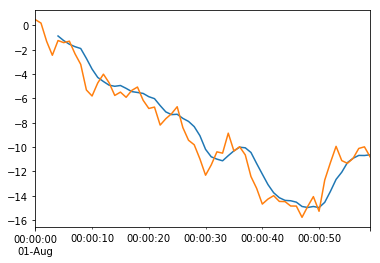

In [90]:
# get data from only the following minute
first_minute = walk['2014-08-01 00:00']
# calculate a rol1ing mean window of 5 periods
means = first_minute.rolling(window=5, center=False).mean()
# plot means vs original data
means.plot()
first_minute.plot();

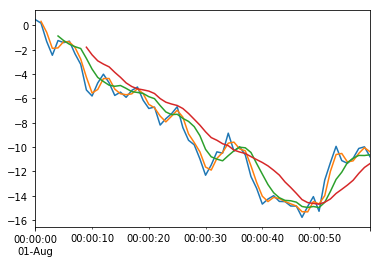

In [91]:
# demonstrate the difference between 2, 5 and
# 10 interval rolling windows
h1w = walk['2014-08-01 00:00']
means2 = h1w.rolling(window=2, center=False).mean()
means5 = h1w.rolling(window=5, center=False).mean()
means10 = h1w.rolling(window=10, center=False).mean()
h1w.plot()
means2.plot()
means5.plot()
means10.plot();

c:\users\andre\scoop\apps\python\3.7.2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


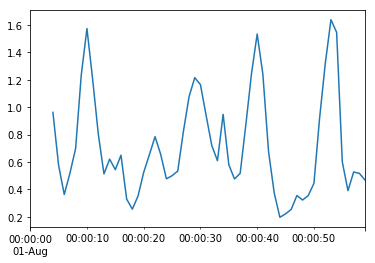

In [92]:
# calculate mean average deviation with window of 5 intervals
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
means = h1w.rolling(window=5, center=False).apply(mean_abs_dev)
means.plot();

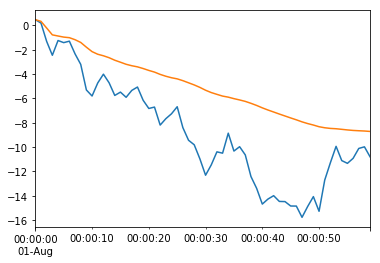

In [95]:
# calculate an expanding rolling mean
h1w.plot()
expanding = h1w.expanding(min_periods=1).mean()
expanding.plot();